Animation saved as 'balls_inclined_plane.mp4'


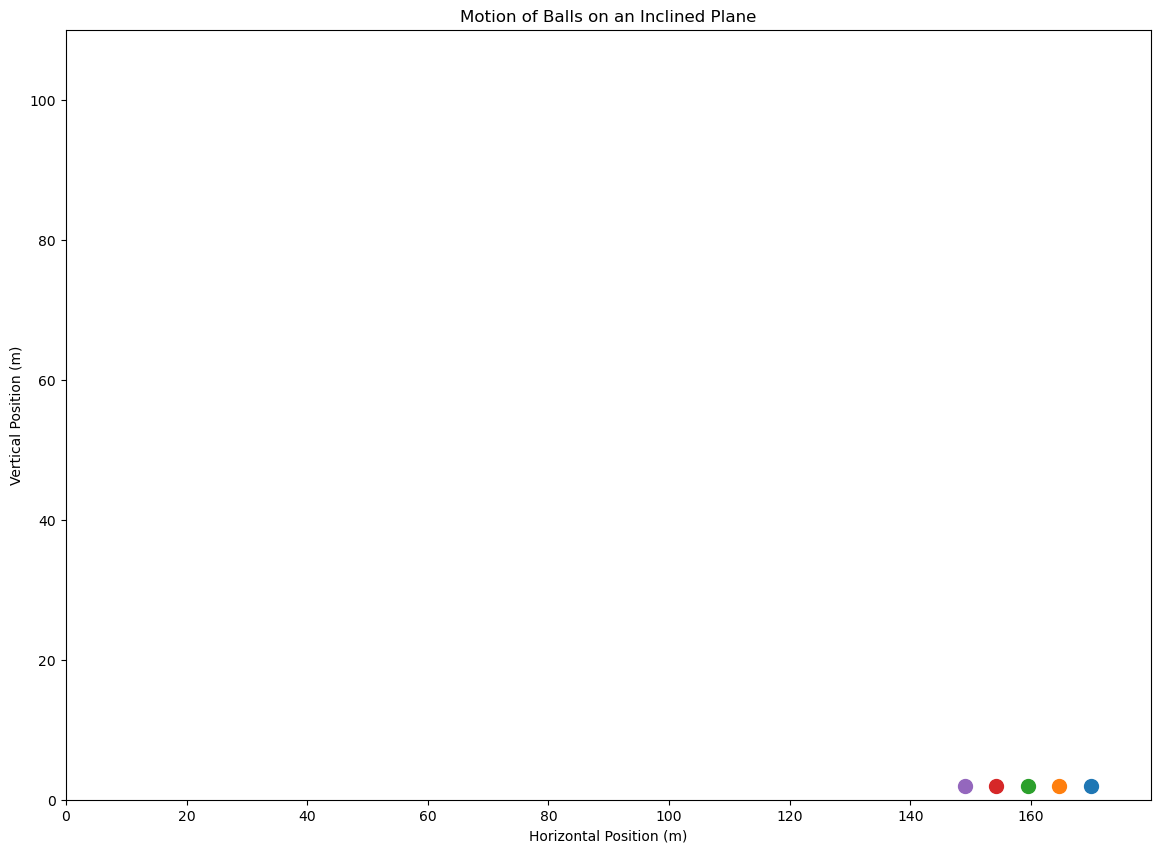

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, FFMpegWriter

# Constants
GRAVITY = 9.81  # Gravitational acceleration in m/s^2
THETA = np.radians(30)  # Inclined plane angle in radians
FRICTION_COEFF = 0.1  # Friction coefficient

# Initial conditions for five balls aligned on the same inclined plane
INITIAL_CONDITIONS = [
    {"mass": 4.0, "radius": 2.0, "x": 0.0, "y": 100.0, "v": 0.0},  # Ball 1
    {"mass": 20.0, "radius": 2.0, "x": 0.0, "y": 97.0, "v": 0.0},  # Ball 2
    {"mass": 0.5, "radius": 2.0, "x": 0.0, "y": 94.0, "v": 0.0},  # Ball 3
    {"mass": 40.0, "radius": 2.0, "x": 0.0, "y": 91.0, "v": 0.0},  # Ball 4
    {"mass": 2.5, "radius": 2.0, "x": 0.0, "y": 88.0, "v": 0.0},  # Ball 5
]

# Simulation parameters
TIME_STEP = 0.01   # Time step in seconds
TOTAL_TIME = 20.0   # Total simulation time

# Calculate acceleration along the inclined plane
def calculate_acceleration(mass, radius, angle, friction, gravity):
    inertia_factor = (1 + (2 / 5) * (radius / mass))   # Inertia factor for a sphere
    return gravity * (np.sin(angle) - friction * np.cos(angle)) / inertia_factor

# Detect collisions between balls
def detect_collisions(positions, radii):
    collisions = []
    for i in range(len(positions)):
        for j in range(i + 1, len(positions)):
            distance = np.sqrt((positions[i][1] - positions[j][1])**2)
            if distance <= (radii[i] + radii[j]):
                collisions.append((i, j))
    return collisions

# Resolve collisions between two balls
def resolve_collision(ball1, ball2):
    m1, m2 = ball1["mass"], ball2["mass"]
    v1, v2 = ball1["velocity"], ball2["velocity"]

    # New velocities after collision (momentum conservation)
    new_v1 = (v1 * (m1 - m2) + 2 * m2 * v2) / (m1 + m2)
    new_v2 = (v2 * (m2 - m1) + 2 * m1 * v1) / (m1 + m2)

    ball1["velocity"] = new_v1
    ball2["velocity"] = new_v2

# Generate time points
time_points = np.arange(0, TOTAL_TIME, TIME_STEP)

# Store results for all balls
results = []

for initial in INITIAL_CONDITIONS:
    mass = initial["mass"]
    radius = initial["radius"]
    acceleration = calculate_acceleration(mass, radius, THETA, FRICTION_COEFF, GRAVITY)

    x_positions = []
    y_positions = []
    velocities = []

    x_position = initial["x"]
    y_position = initial["y"]
    velocity = initial["v"]

    for time in time_points:
        x_positions.append(x_position)
        y_positions.append(y_position)
        velocities.append(velocity)

        if y_position > radius:   # Update positions and velocity until the ball reaches the bottom of the plane
            velocity += acceleration * TIME_STEP
            x_position += velocity * np.cos(THETA) * TIME_STEP
            y_position -= velocity * np.sin(THETA) * TIME_STEP

        if y_position <= radius:   # Stop the ball at the bottom of the plane
            y_position = radius
            velocity = 0

        positions = [(x_positions[-1], y_positions[-1]) for _ in results]
        radii_list = [ball["radius"] for ball in INITIAL_CONDITIONS]
        collisions = detect_collisions(positions,radii_list)

        for i, j in collisions:
            resolve_collision(results[i], results[j])

    results.append({
        "x_positions": np.array(x_positions),
        "y_positions": np.array(y_positions),
        "velocities": np.array(velocities),
        "mass": mass,
        "radius": radius,
        "velocity": velocity,
    })

# Create animation figure and axis
fig, ax = plt.subplots(figsize=(14, 10))
ax.set_xlim(0, max([max(result["x_positions"]) for result in results]) + 10)
ax.set_ylim(0, max([max(result["y_positions"]) for result in results]) + 10)
ax.set_title("Motion of Balls on an Inclined Plane")
ax.set_xlabel("Horizontal Position (m)")
ax.set_ylabel("Vertical Position (m)")

# Initialize balls as points on the plot
balls_plot = [
    ax.plot([], [], 'o', markersize=10)[0] for _ in INITIAL_CONDITIONS
]

# Initialize animation function
def init():
    for ball in balls_plot:
        ball.set_data([], [])
    return balls_plot

# Update function for animation frames
def update(frame):
    for i, ball_plot in enumerate(balls_plot):
        x_data = results[i]["x_positions"][frame]
        y_data = results[i]["y_positions"][frame]
        ball_plot.set_data([x_data], [y_data])
    return balls_plot

# Create animation using FuncAnimation
anim = FuncAnimation(
    fig,
    update,
    frames=len(time_points),
    init_func=init,
    blit=True,
)

# Save animation to MP4 file using FFMpegWriter
writer = FFMpegWriter(fps=30)
anim.save("balls_inclined_plane.mp4", writer=writer)

print("Animation saved as 'balls_inclined_plane.mp4'")
